In [ ]:
# general imports
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import string

# tensorflow model imports
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow import keras

# sklearn modeling imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# visualization imports
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# importing data from drive file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import functs

In [ ]:
path='/content/drive/My Drive/Colab Notebooks/Loan Data DEC22-MAR23.xlsx' # importing our data
mar23 = pd.read_excel(path,'MAR23') # importing the first, march 2023 excel sheet
dec22 = pd.read_excel(path,'DEC22') # importing the second, dec 2022 excel sheet

# Data Preprocessing

In [ ]:
dec22.head()

,cutoff_date,loan_id,loan_group,loan_program,orig_credit_score,loan_purpose_type,property_type,property_state,lien_position,original_cltv,...,orig_date,original_loan_term,rterm,original_interest_rate,current_interest_rate,delinquent_dt,days_delinquent,loan_status,original_dti_rate,charge off?
0,2022-12-30,loan_10000057796,NaN,PRIMARY,712,Debt consolidation,SFR,FL,Junior,0.7644,...,2022-02-15,120,110,0.0670,0.0670,NaT,0,IN_REPAY,0.2661,No
1,2022-12-30,loan_10000046566,NaN,PRIMARY,718,Debt consolidation,TOWNHOUSE/ROWHOUSE,MT,Junior,0.8996,...,2022-04-15,360,352,0.0820,0.0820,NaT,0,IN_REPAY,0.2869,No
2,2022-12-30,loan_10000041028,NaN,PRIMARY,650,Debt consolidation,CONDO,AZ,Junior,0.4856,...,2021-07-15,120,103,0.0700,0.0700,NaT,0,IN_REPAY,0.4910,No
3,2022-12-30,loan_10000067474,NaN,PRIMARY,680,Home improvement,SFR,FL,Junior,0.6394,...,2021-10-15,180,166,0.0664,0.0664,NaT,0,IN_REPAY,0.4993,No
4,2022-12-30,loan_10000047479,loan_10000092177,DRAW,770,Debt consolidation,SFR,IL,Junior,0.9000,...,2022-11-10,105,104,0.1030,0.1030,NaT,0,IN_REPAY,0.2032,No


In [ ]:
dec22.shape, mar23.shape

((85310, 24), (95768, 24))

In [ ]:
# calling our delinquent column function to label delq loans
functs.combine_delq(mar23) # apply to both dataframes
functs.combine_delq(dec22)

In [ ]:
mar23.head()

,cutoff_date,loan_id,loan_group,loan_program,orig_credit_score,loan_purpose_type,property_type,property_state,lien_position,original_cltv,...,original_loan_term,rterm,original_interest_rate,current_interest_rate,delinquent_dt,days_delinquent,loan_status,original_dti_rate,Charge Off Hardcoded,Delq
0,2023-03-31,loan_10000000002,loan_10000071534,DRAW,831,Home improvement,SFR,CA,Junior,0.6733,...,172,0,0.0841,0.0841,NaT,0,PAID_CLOSED,0.4744,No,1
1,2023-03-31,loan_10000000003,NaN,PRIMARY,725,Home improvement,SFR,NJ,Junior,0.7138,...,360,353,0.0875,0.0875,NaT,0,IN_REPAY,0.2540,No,1
2,2023-03-31,loan_10000000004,loan_10000024216,DRAW,711,Home improvement,SFR,AZ,Junior,0.7771,...,100,91,0.0799,0.0799,NaT,0,IN_REPAY,0.2203,No,1
3,2023-03-31,loan_10000000005,NaN,PRIMARY,686,Debt consolidation,SFR,CO,Junior,0.6698,...,120,0,0.0825,0.0825,NaT,0,PAID_CLOSED,0.1493,No,1
4,2023-03-31,loan_10000000006,NaN,PRIMARY,703,Debt consolidation,SFR,FL,Junior,0.9000,...,180,0,0.1125,0.1125,NaT,0,PAID_CLOSED,0.2035,No,1


In [ ]:
import sqlite3
conn=sqlite3.connect("loans.db") # creates a local sql database connection

In [ ]:
cursor=conn.cursor()
mar23.to_sql('mar23', conn, if_exists='replace', index=False) # creates mar23 sql table

95768

In [ ]:
dec22.to_sql('dec22',conn,if_exists='replace',index=False) # creates dec22 sql table

85310

In [ ]:
# our sql query command for merging the two dataframes with the same loan ID's
cmd=\
"""
SELECT mar23.*, dec22.delq AS decDelq
FROM mar23 LEFT JOIN dec22 ON mar23.loan_id = dec22.loan_id
"""
loan_merged=pd.read_sql_query(cmd,conn)
loan_merged

,cutoff_date,loan_id,loan_group,loan_program,orig_credit_score,loan_purpose_type,property_type,property_state,lien_position,original_cltv,...,rterm,original_interest_rate,current_interest_rate,delinquent_dt,days_delinquent,loan_status,original_dti_rate,Charge Off Hardcoded,Delq,decDelq
0,2023-03-31 00:00:00,loan_10000000002,loan_10000071534,DRAW,831,Home improvement,SFR,CA,Junior,0.6733,...,0,0.0841,0.0841,None,0,PAID_CLOSED,0.4744,No,1,1.0
1,2023-03-31 00:00:00,loan_10000000003,None,PRIMARY,725,Home improvement,SFR,NJ,Junior,0.7138,...,353,0.0875,0.0875,None,0,IN_REPAY,0.2540,No,1,1.0
2,2023-03-31 00:00:00,loan_10000000004,loan_10000024216,DRAW,711,Home improvement,SFR,AZ,Junior,0.7771,...,91,0.0799,0.0799,None,0,IN_REPAY,0.2203,No,1,1.0
3,2023-03-31 00:00:00,loan_10000000005,None,PRIMARY,686,Debt consolidation,SFR,CO,Junior,0.6698,...,0,0.0825,0.0825,None,0,PAID_CLOSED,0.1493,No,1,1.0
4,2023-03-31 00:00:00,loan_10000000006,None,PRIMARY,703,Debt consolidation,SFR,FL,Junior,0.9000,...,0,0.1125,0.1125,None,0,PAID_CLOSED,0.2035,No,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95763,2023-03-31 00:00:00,loan_10000095765,None,PRIMARY,832,Debt consolidation,SFR,IL,Junior,0.8406,...,343,0.0786,0.0786,None,0,IN_REPAY,0.3528,No,1,1.0
95764,2023-03-31 00:00:00,loan_10000095766,None,PRIMARY,749,Home improvement,SFR,OH,Junior,0.9000,...,175,0.1106,0.1106,None,0,IN_REPAY,0.2717,No,1,1.0
95765,2023-03-31 00:00:00,loan_10000095767,None,PRIMARY,843,Home improvement,SFR,CA,Junior,0.0790,...,0,0.0635,0.0635,None,0,PAID_CLOSED,0.2008,No,1,1.0
95766,2023-03-31 00:00:00,loan_10000095768,None,PRIMARY,833,Other purchase,SFR,NC,Junior,0.6773,...,60,0.0901,0.0901,None,0,IN_REPAY,0.3548,No,1,NaN


In [ ]:
conn.close() # closes the connect to the sql "loans" database

In [ ]:
functs.merge_delq_columns(loan_merged)

loan_merged.head(20)
# interesting notes:
#loan 15 is an example for a delq loan in mar23,
#loan 19 has a delq value, while not being delq in mar23

,cutoff_date,loan_id,loan_group,loan_program,orig_credit_score,loan_purpose_type,property_type,property_state,lien_position,original_cltv,...,original_loan_term,rterm,original_interest_rate,current_interest_rate,delinquent_dt,days_delinquent,loan_status,original_dti_rate,Charge Off Hardcoded,Delq
0,2023-03-31 00:00:00,loan_10000000002,loan_10000071534,DRAW,831,Home improvement,SFR,CA,Junior,0.6733,...,172,0,0.0841,0.0841,None,0,PAID_CLOSED,0.4744,No,1
1,2023-03-31 00:00:00,loan_10000000003,None,PRIMARY,725,Home improvement,SFR,NJ,Junior,0.7138,...,360,353,0.0875,0.0875,None,0,IN_REPAY,0.2540,No,1
2,2023-03-31 00:00:00,loan_10000000004,loan_10000024216,DRAW,711,Home improvement,SFR,AZ,Junior,0.7771,...,100,91,0.0799,0.0799,None,0,IN_REPAY,0.2203,No,1
3,2023-03-31 00:00:00,loan_10000000005,None,PRIMARY,686,Debt consolidation,SFR,CO,Junior,0.6698,...,120,0,0.0825,0.0825,None,0,PAID_CLOSED,0.1493,No,1
4,2023-03-31 00:00:00,loan_10000000006,None,PRIMARY,703,Debt consolidation,SFR,FL,Junior,0.9000,...,180,0,0.1125,0.1125,None,0,PAID_CLOSED,0.2035,No,1
5,2023-03-31 00:00:00,loan_10000000007,loan_10000043174,DRAW,650,Debt consolidation,SFR,CA,Junior,0.6238,...,89,79,0.0925,0.0925,None,0,IN_REPAY,0.1711,No,1
6,2023-03-31 00:00:00,loan_10000000008,loan_10000074536,DRAW,727,Debt consolidation,CONDO,OR,Junior,0.9500,...,140,139,0.1171,0.1171,None,0,IN_REPAY,0.3723,No,1
7,2023-03-27 00:00:00,loan_10000000009,loan_10000034574,DRAW,717,Debt consolidation,CONDO,IL,Junior,0.9000,...,108,101,0.0945,0.0945,2023-01-24 00:00:00,63,TRANSFERRED,0.3186,No,1
8,2023-03-31 00:00:00,loan_10000000010,None,PRIMARY,741,Small Business,SFR,FL,Junior,0.8000,...,360,359,0.1022,0.1022,None,0,IN_REPAY,0.3969,No,1
9,2023-03-31 00:00:00,loan_10000000011,None,PRIMARY,815,Debt consolidation,TOWNHOUSE/ROWHOUSE,CO,Junior,0.7051,...,120,111,0.0575,0.0575,None,0,IN_REPAY,0.3149,No,1


In [ ]:
list(loan_merged.columns) # a list of all the columns, some untrainable

['cutoff_date',
 'loan_id',
 'loan_group',
 'loan_program',
 'orig_credit_score',
 'loan_purpose_type',
 'property_type',
 'property_state',
 'lien_position',
 'original_cltv',
 'original_loan_bal',
 'loan_avail_draw_amount',
 'loan_draw_remaining_term',
 'prin_bal',
 'orig_date',
 'original_loan_term',
 'rterm',
 'original_interest_rate',
 'current_interest_rate',
 'delinquent_dt',
 'days_delinquent',
 'loan_status',
 'original_dti_rate',
 'Charge Off Hardcoded',
 'Delq']

In [ ]:
functs.clean_data_for_ml(loan_merged)
loan_merged = loan_merged.dropna()

In [ ]:
loan_merged.head()

,loan_program,orig_credit_score,loan_purpose_type,property_type,property_state,lien_position,original_cltv,original_loan_bal,loan_avail_draw_amount,loan_draw_remaining_term,prin_bal,orig_date,original_loan_term,rterm,original_interest_rate,current_interest_rate,original_dti_rate,Charge Off Hardcoded,Delq
0,0,831,5,4,4,1,0.6733,50000.0,0.00,0,0.00,963,172,0,0.0841,0.0841,0.4744,0,1
1,1,725,5,4,28,1,0.7138,57119.0,0.00,53,56858.35,965,360,353,0.0875,0.0875,0.2540,0,1
2,0,711,5,4,3,1,0.7771,1500.0,4057.65,7,1401.09,929,100,91,0.0799,0.0799,0.2203,0,1
3,1,686,1,4,5,1,0.6698,56650.0,0.00,0,0.00,185,120,0,0.0825,0.0825,0.1493,0,1
4,1,703,1,4,8,1,0.9000,40122.0,0.00,0,0.00,266,180,0,0.1125,0.1125,0.2035,0,1


In [ ]:
# list of all the features we want to train our model on
predictor_labels = ["loan_program",
                    "orig_credit_score",
                    "loan_purpose_type",
                    "property_type",
                    "property_state",
                    "lien_position",
                    "original_cltv",
                    "original_loan_bal",
                    "loan_avail_draw_amount",
                    "loan_draw_remaining_term",
                    "prin_bal",
                    "orig_date",
                    "original_loan_term",
                    "rterm",
                    "original_interest_rate",
                    "current_interest_rate" ,
                    "original_dti_rate" ,
                    "Charge Off Hardcoded"]

'\nsns.set_style("darkgrid")\nbar=sns.countplot(x = "Delq", data = loan_merged)\nbar.set_xlabel(\'Delinquent?\')\nbar.set_ylabel(\'Count\')\nbar.set_title(\'Delinquency Count\')\n'

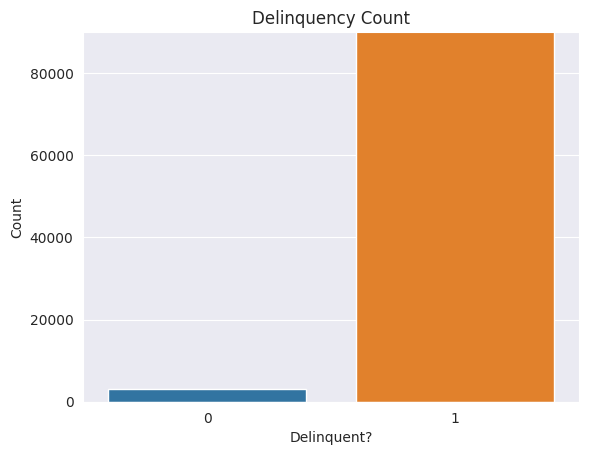

In [ ]:
# looking at the spread of our data of delinquents versus non
functs.delq_count_bar(loan_merged)

Due to the large disparity between class sizes of delinquency and non, the following code shows both an oversampling and undersampling approach, and then training on identical Keras Sequential models.

# Oversampling

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight
from collections import Counter

Random over-sampling:
0    92282
1    92282
Name: Delq, dtype: int64


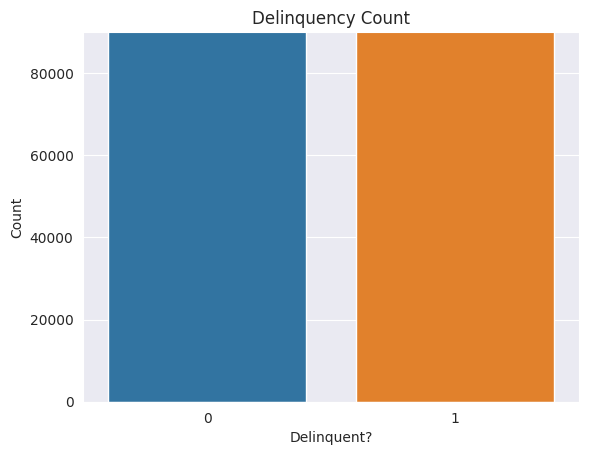

In [ ]:
# over sampling, amplifying the small amount of delinquent data to match non-delq
count_class_nondelq, count_class_delq = loan_merged['Delq'].value_counts()

df_delq = loan_merged[loan_merged['Delq'] == 0]
df_nondelq = loan_merged[loan_merged['Delq'] == 1]

# oversampling the delinquent class to match non delq class
df_delq_over = df_delq.sample(count_class_nondelq, replace=True)
df_test_over = pd.concat([df_delq_over, df_nondelq], axis=0)

print('Random over-sampling:')
print(df_test_over['Delq'].value_counts())

functs.delq_count_bar(df_test_over)

Now we have an equal number of samples for both the delinquent and non delinquent classes, so we can begin training.

<Axes: >

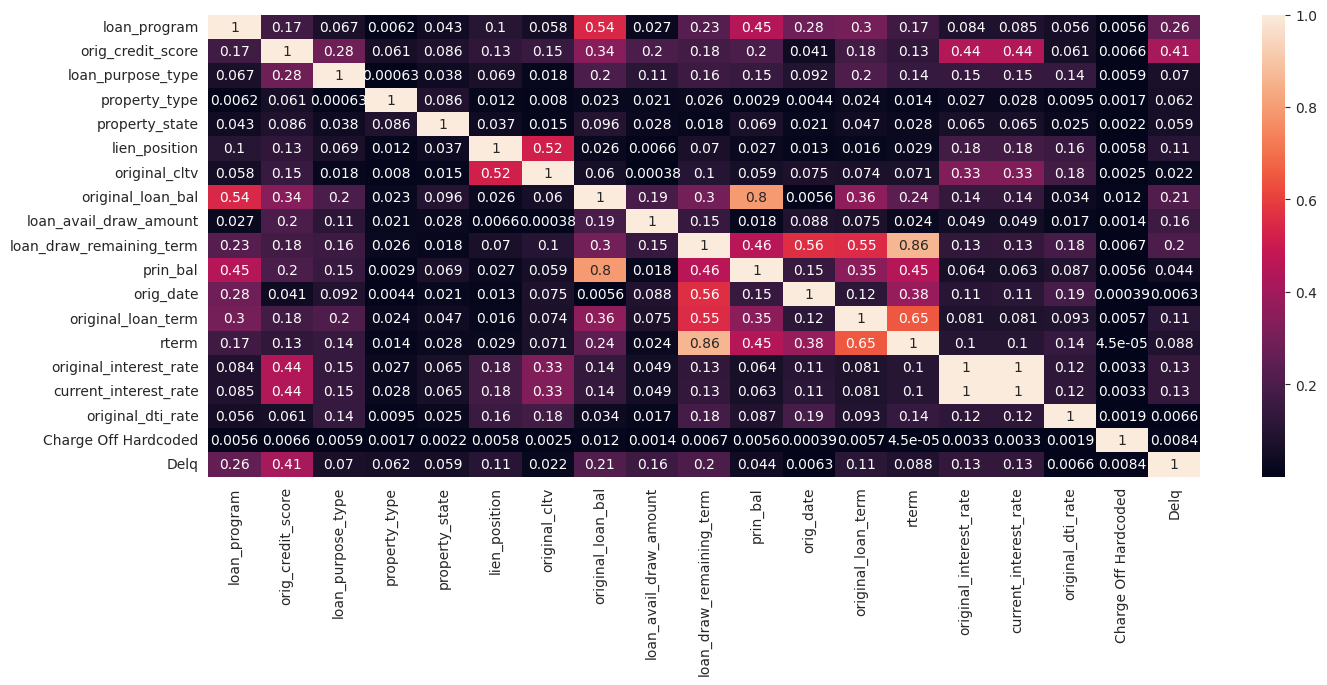

In [ ]:
# looking at correlations between the different variables
corr = df_test_over.corr().abs()
plt.figure(figsize = (16, 6))
sns.heatmap(corr, annot = True)

First we split our data into both our X and y train and test, so we can begin training.

In [ ]:
X_train,X_test,y_train,y_test = functs.traintest(df_test_over)

In [ ]:
# keras sequential model with dense layers
model_over = tf.keras.Sequential([
    layers.Dense(18, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_over.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()]
)# evaluating with precision and recall metrics

history_over=model_over.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test, y_test)
)

Epoch 1/20
1010/1010 [==============================] - 4s 3ms/step - loss: 0.5433 - precision: 0.7004 - recall: 0.7701 - val_loss: 0.4856 - val_precision: 0.7657 - val_recall: 0.7868
Epoch 2/20
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4681 - precision: 0.8081 - recall: 0.7500 - val_loss: 0.4538 - val_precision: 0.8249 - val_recall: 0.7458
Epoch 3/20
1010/1010 [==============================] - 3s 2ms/step - loss: 0.4463 - precision: 0.8224 - recall: 0.7605 - val_loss: 0.4403 - val_precision: 0.8412 - val_recall: 0.7535
Epoch 4/20
1010/1010 [==============================] - 4s 4ms/step - loss: 0.4316 - precision: 0.8304 - recall: 0.7708 - val_loss: 0.4245 - val_precision: 0.8585 - val_recall: 0.7523
Epoch 5/20
1010/1010 [==============================] - 3s 3ms/step - loss: 0.4211 - precision: 0.8376 - recall: 0.7800 - val_loss: 0.4140 - val_precision: 0.8449 - val_recall: 0.7862
Epoch 6/20
1010/1010 [==============================] - 2s 2ms/step - loss: 0.41

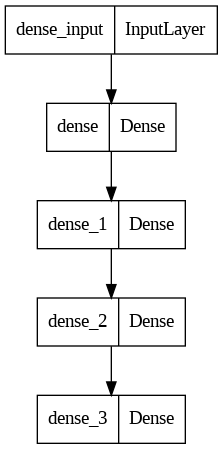

In [ ]:
# visualizing our model layers
from tensorflow.keras import utils
utils.plot_model(model_over)

In [ ]:
# more layer and parameter visualization
model_over.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 10)                190       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Prediction
over_model_prediction = model_over.predict(X_test)
over_model_classes =  [1 if i>0.5 else 0 for i in over_model_prediction]

# Check the model performance
print(classification_report(y_test, over_model_classes))

1731/1731 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     27763
           1       0.88      0.83      0.85     27607

    accuracy                           0.86     55370
   macro avg       0.86      0.86      0.86     55370
weighted avg       0.86      0.86      0.86     55370



We were able to achieve an F-score of about 85%, and have fairly equally distributed precision and recall scores for the two variables. This suggests that the model was not extremely overfitted on one variable, and was able to both accurately classify delinquent loans, and with rather reasonable precision.

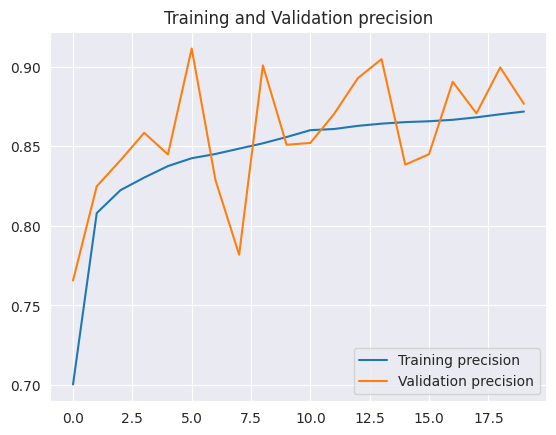

In [ ]:
functs.history_graph(history_over, "precision")

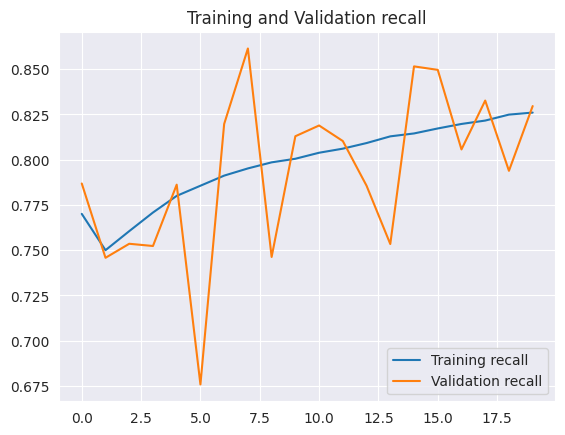

In [ ]:
functs.history_graph(history_over, "recall")

<Axes: >

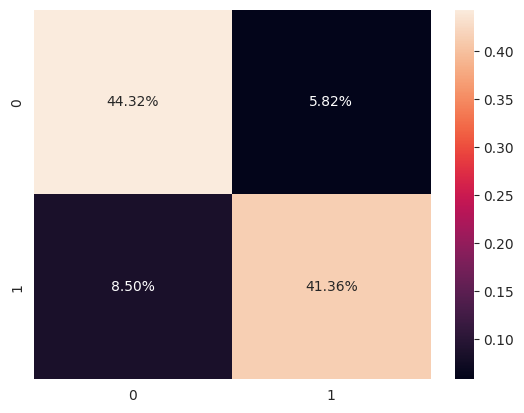

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,over_model_classes)
sns.heatmap(cm/np.sum(cm),annot=True, fmt='.2%')

This confusion matrix displays the classification percentages of all the True/False Positives and True/False Negatives. An ideal confusion matrix minimizes the scores seen in the top right and bottom left corners. We can see that our results were fairly well distributed, but we did see a higher percentage of about 8.5% of loans that were classified as non-delinquent, but ended up being delinquent.

# Undersampling

Here, we follow very similar code and setup as our oversampling approach.

In [ ]:
# Count samples per class
classes_delq = loan_merged[loan_merged['Delq'] == 0]
classes_nondelq = loan_merged[loan_merged['Delq'] == 1]

# Print sizes
print(f'Class delq: {len(classes_delq)}')
print(f'Class nondelq: {len(classes_nondelq)}')

# Undersample zero to the size of one
classes_nondelq = classes_nondelq.sample(len(classes_delq))

# Print sizes
print(f'Class 0: {len(classes_delq)}')
print(f'Class 1: {len(classes_nondelq)}')

Class delq: 3136
Class nondelq: 92282
Class 0: 3136
Class 1: 3136


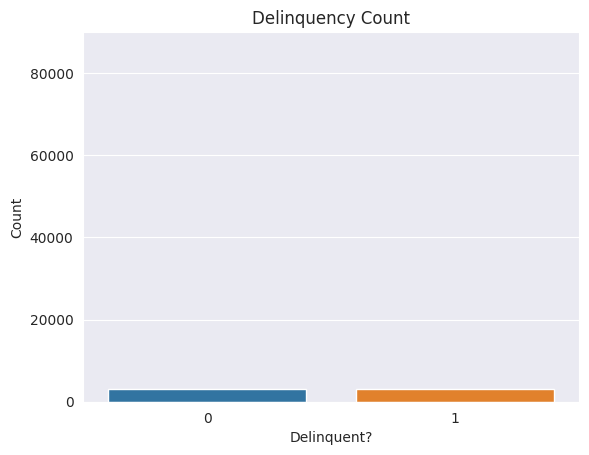

In [ ]:
df_test_under = pd.concat([classes_delq, classes_nondelq], axis=0)

functs.delq_count_bar(df_test_under)

In [ ]:
X_train,X_test,y_train,y_test = functs.traintest(df_test_under)

In [ ]:
model_under = tf.keras.Sequential([
    layers.Dense(18, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_under.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()]
)
history_under=model_under.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=256,
        validation_data=(X_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 18ms/step - loss: 0.6877 - precision_1: 0.5639 - recall_1: 0.8487 - val_loss: 0.6832 - val_precision_1: 0.5887 - val_recall_1: 0.8100
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6795 - precision_1: 0.6017 - recall_1: 0.7657 - val_loss: 0.6744 - val_precision_1: 0.6239 - val_recall_1: 0.6921
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.6708 - precision_1: 0.6337 - recall_1: 0.6418 - val_loss: 0.6658 - val_precision_1: 0.6406 - val_recall_1: 0.6529
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6619 - precision_1: 0.6503 - recall_1: 0.6053 - val_loss: 0.6567 - val_precision_1: 0.6437 - val_recall_1: 0.7038
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6514 - precision_1: 0.6332 - recall_1: 0.7443 - val_loss: 0.6465 - val_precision_1: 0.6364 - val_recall_1: 0.7505
Epoch 6/20
18/18 [==============================] - 0s 7ms/

In [ ]:
# Prediction
under_model_prediction = model_under.predict(X_test)
under_model_classes =  [1 if i>0.5 else 0 for i in under_model_prediction]

# Check the model performance
print(classification_report(y_test, under_model_classes))

59/59 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       940
           1       0.71      0.77      0.74       942

    accuracy                           0.73      1882
   macro avg       0.73      0.73      0.73      1882
weighted avg       0.73      0.73      0.73      1882



Our results for undersampling averaged to be around 72-73% for our F score averages of precision and recall, which is higher than the baseline of 50% accuracy, but lower than the results we reached for oversampling.

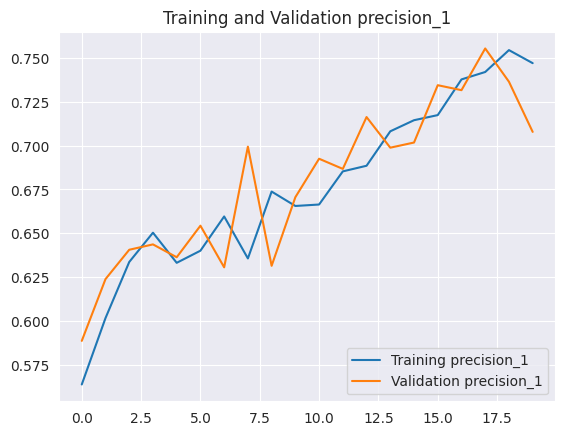

In [ ]:
functs.history_graph(history_under, "precision_1")

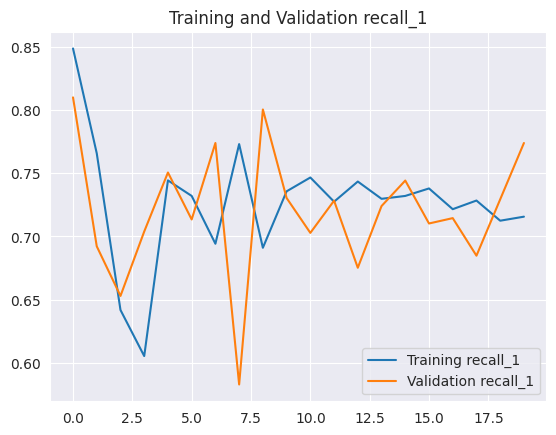

In [ ]:
functs.history_graph(history_under, "recall_1")

<Axes: >

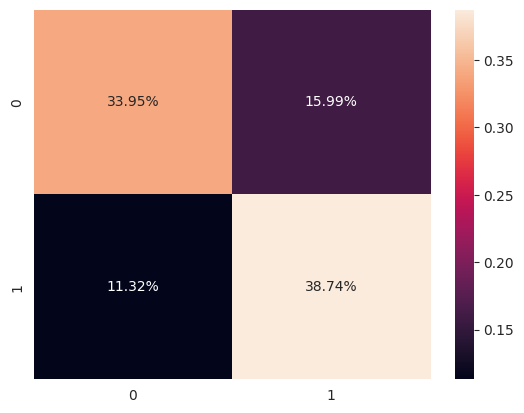

In [ ]:
cm=confusion_matrix(y_test,under_model_classes)
sns.heatmap(cm/np.sum(cm),annot=True, fmt='.2%')

Following the same explanation of our confusion matrix as in the oversampling approach, we see that our undersampling model did not perform as well. There are much greater percentages in our False Negative and False Positive quadrants, adding up to about 27% of our classification conclusions to be incorrect. However, overall there is no class that seems to perform far better than the other, which suggests less risk of overfitting.